## Binary Search Trees
### A binary search tree relies on the property that keys that are less than the parent are found in the left subtree, and keys that are greater than the parent are found in the right subtree.

* To implement the binary search tree, we will use the nodes and references approach similar to the one we used to implement the linked list, and the expression tree. 
* However, because we must be able create and work with a binary search tree that is empty, our implementation will use two classes. 
* The first class we will call BinarySearchTree, and the second class we will call TreeNode. 
* The BinarySearchTree class has a reference to the TreeNode that is the root of the binary search tree. 

In [97]:
class TreeNode:

    def __init__(self,key,val,left=None,right=None,parent=None):
        # In a bare bones BST, a key is used to uniquely identify a particular node 
        # in the tree and the value is nothing but data associated with that node.
        # A good analogy: A node is a container. The Value is what you put into that container, 
        # and the Key is how you mark the container so that you can retrieve it later.
        self.key = key
        self.payload = val
        self.leftChild = left
        self.rightChild = right
        self.parent = parent

    def hasLeftChild(self):
        return self.leftChild

    def hasRightChild(self):
        return self.rightChild

    def isLeftChild(self):
        return self.parent and self.parent.leftChild == self

    def isRightChild(self):
        return self.parent and self.parent.rightChild == self

    def isRoot(self):
        return not self.parent

    def isLeaf(self):
        return not (self.rightChild or self.leftChild)

    def hasAnyChildren(self):
        return self.rightChild or self.leftChild

    def hasBothChildren(self):
        return self.rightChild and self.leftChild

    def replaceNodeData(self,key,value,lc,rc):
        self.key = key
        self.payload = value
        self.leftChild = lc
        self.rightChild = rc

        if self.hasLeftChild():
            self.leftChild.parent = self
            
        if self.hasRightChild():
            self.rightChild.parent = self

    # using inorder traversal of BST
    # the successor can be the smallest key on the right subtree
    # or the largest key on the left subtree of the to-be-removed node
    def findSuccessor(self):
        
        succ = None

        # if it has right child then the succ is the smallest key in the right tree,
        # becasue a child key greater than parent key goes to right, and vice versa.
        if self.hasRightChild():
            succ = self.rightChild.findMin()
        
        # if it only has left child
        else:
            # if it is not the root
            if self.parent:
                
                # if this current node is a left child of its parent then it is a succ
                # because a child key less than parent key goes to left, and vice versa.
                if self.isLeftChild():
                    succ = self.parent

                # if this current node is the right child of its parent, and of course 
                # this node has no right child then the successor to this node is 
                # the successor of its parent excluding this node
                else:
                    self.parent.rightChild = None
                    succ = self.parent.findSuccessor()
                    self.parent.rightChild = self
        return succ

    # in BST properties, the key with minimum value is the leftmost child of the tree
    def findMin(self):
        
        current = self
        while current.hasLeftChild():
            current = current.leftChild
        return current
    
    # splice out after finding the successor
    # meaning the nodes that are connecting to the 
    # succ node need to be spliced or connected back,
    # after the succ node will be deleted where it orginal is.
    def spliceOut(self):

        # if the succ node has no children
        # then we can directly delete the node
        if self.isLeaf():

            if self.isLeftChild():
                self.parent.leftChild = None

            else:
                self.parent.rightChild = None

        # if it has any children
        else:
            # and if it is a right child of its parent
            if self.isRightChild():
                self.parent.rightChild = self.rightChild
                self.rightChild.parent = self.parent

            # or if it is a left child of its parent
            else:
                self.parent.leftChild = self.rightChild
                self.rightChild.parent = self.parent
    
    # it allows to use a for loop on it 
    # ex: for payload in myTree:
    #       print(payload)
    def __iter__(self):
        
        if self.leftChild:
            yield from self.leftChild

        yield self.payload

        if self.rightChild:
            yield from self.rightChild

## Put Method
### it will check to see if the tree already has a root. If there is not a root then put will create a new TreeNode and install it as the root of the tree.
### If a root node is already in place then put calls the private, recursive, helper function put to search the tree according to the following algorithm…
* Starting at the root of the tree, search the binary tree comparing the new key to the key in the current node.
* If the new key is less than the current node, search the left subtree. If the new key is greater than the current node, search the right subtree.
* When there is no left (or right) child to search, we have found the position in the tree where the new node should be installed.
* To add a node to the tree, create a new TreeNode object and insert the object at the point discovered in the previous step.

### Note: Insertion of a duplicate key is handled by replacing the old value of that key with the new one. The current method ignores this duplicate subkey scenario.

## Get Method
### Once the tree is constructed, the next task is to implement the retrieval of a value for a given key. 
### The get method is even easier than the put method because it simply searches the tree recursively until it gets to a non-matching leaf node or finds a matching key. 
### When a matching key is found, the value stored in the payload of the node is returned.

## Deleting Nodes

### The first task is to find the node to delete by searching the tree. 
### If the tree has more than one node we search using the _get method to find the TreeNode that needs to be removed.
### If the tree only has a single node, that means we are removing the root of the tree, but we still must check to make sure the key of the root matches the key that is to be deleted. 
### In either case if the key is not found the del operator raises an error.
### Once we’ve found the node containing the key we want to delete, there are three cases that we must consider:
* The first case is straightforward. If the current node has no children all we need to do is delete the node and remove the reference to this node in the parent.
* The second case is only slightly more complicated. If a node has only a single child, then we can simply promote the child to take the place of its parent.
* The third case is the most difficult case to handle. If a node has two children, then it is unlikely that we can simply promote one of them to take the node’s place. We can, however, search the tree for a node that can be used to replace the one scheduled for deletion.
    * What we need is a node that will preserve the binary search tree relationships for both of the existing left and right subtrees. 
    * The node that will do this is the node that has the next-largest key in the tree. We call this node the successor.
    * The successor is guaranteed to have no more than one child, so we know how to remove it using the two cases for deletion that we have already implemented. 
    * Once the successor has been removed, we simply put it in the tree in place of the node to be deleted.
    * Notice that we make use of the helper methods findSuccessor and findMin to find the successor. 
    * To remove the successor, we make use of the method spliceOut. 
    * The reason we use spliceOut is that it goes directly to the node we want to splice out and makes the right changes.


In [98]:
class BinarySearchTree:

    # init
    def __init__(self):
        self.root = None
        self.size = 0

    # it allows to .length() method
    def length(self):
        return self.size

    # it allows to call the built in len() method
    def __len__(self):
        return self.size
        #if self.root:
            #yield from self.root
    
    # built-in method iteration that interates through every node
    # it allows to use the square bracket method, ex: myTree[3], myTree[0]
    def __iter__(self):
        return self.root.__iter__()

    # main method used to add key
    # without _ is for code factoring or refactoring
    def put(self,key,val): 

        if self.root:
            self._put(key,val,self.root)

        else:
            self.root = TreeNode(key,val)

        self.size = self.size + 1

    # with _ is used as a helper function to do the heavy lifting
    def _put(self,key,val,currentNode):

        if key < currentNode.key:

            if currentNode.hasLeftChild():
                   self._put(key,val,currentNode.leftChild)

            else:
                   currentNode.leftChild = TreeNode(key,val,parent=currentNode)
        else:

            if currentNode.hasRightChild():
                   self._put(key,val,currentNode.rightChild)

            else:
                   currentNode.rightChild = TreeNode(key,val,parent=currentNode)

    # used to call the put method
    def __setitem__(self,k,v):
        self.put(k,v)
    
    # main method used to get key
    # without _ is for code factoring or refactoring
    def get(self,key):

        if self.root:

            res = self._get(key,self.root)

            if res:
                return res.payload

            else:
                return None

        else:
            return None

    # with _ is used as a helper function to do the heavy lifting
    def _get(self,key,currentNode):
        
        if not currentNode:
            return None

        elif currentNode.key == key:
            return currentNode

        elif key < currentNode.key:
            return self._get(key,currentNode.leftChild)

        else:
            return self._get(key,currentNode.rightChild)

    # used to call the get method
    def __getitem__(self,key):
        return self.get(key)

    # This method will simply call get and return True if get returns a value, 
    # or False if it returns None.
    def __contains__(self,key):

        if self._get(key,self.root):
            return True

        else:
            return False
    
    # main method used to delete a node
    def delete(self,key):
        
        if self.size > 1:
            
            nodeToRemove = self._get(key,self.root)

            if nodeToRemove:
                self.remove(nodeToRemove)
                self.size = self.size-1

            else:
                raise KeyError('Error, key not in tree')

        elif self.size == 1 and self.root.key == key:
            self.root = None
            self.size = self.size - 1
            
        else:
            raise KeyError('Error, key not in tree')

    # used to call the delete method
    def __delitem__(self,key):
        self.delete(key)
    
    def remove(self,currentNode):
        
        # first case
        if currentNode.isLeaf(): #leaf
            # check if the current node is a left child or right child
            if currentNode == currentNode.parent.leftChild:
                currentNode.parent.leftChild = None
            else:
                currentNode.parent.rightChild = None
        
        # third case
        elif currentNode.hasBothChildren(): #interior
            
            succ = currentNode.findSuccessor()
            succ.spliceOut()
            currentNode.key = succ.key
            currentNode.payload = succ.payload

        # second case
        else: # this node has one child
            if currentNode.hasLeftChild():

                if currentNode.isLeftChild():
                    currentNode.leftChild.parent = currentNode.parent
                    currentNode.parent.leftChild = currentNode.leftChild

                elif currentNode.isRightChild():
                    currentNode.leftChild.parent = currentNode.parent
                    currentNode.parent.rightChild = currentNode.leftChild

                # the current node is the root, then replace
                else:
                    currentNode.replaceNodeData(currentNode.leftChild.key,
                                    currentNode.leftChild.payload,
                                    currentNode.leftChild.leftChild,
                                    currentNode.leftChild.rightChild)
            else:
                
                if currentNode.isLeftChild():
                    currentNode.rightChild.parent = currentNode.parent
                    currentNode.parent.leftChild = currentNode.rightChild

                elif currentNode.isRightChild():
                    currentNode.rightChild.parent = currentNode.parent
                    currentNode.parent.rightChild = currentNode.rightChild
                
                # the current node is the root, then replace
                else:
                    currentNode.replaceNodeData(currentNode.rightChild.key,
                                    currentNode.rightChild.payload,
                                    currentNode.rightChild.leftChild,
                                    currentNode.rightChild.rightChild)

### Testing BinarySearchTree class without interacting with TreeNode

In [99]:
mytree = BinarySearchTree()
mytree[3]="red"
mytree[4]="blue"
mytree[6]="yellow"
mytree[2]="at"

print(mytree[6])
print(mytree[2])

yellow
at


In [100]:
print(mytree.size)
print(mytree.root.key)

4
3


In [101]:
print(mytree[5])

None


In [102]:
print(mytree.length())

4


In [103]:
mytree[5] = "hello"

In [104]:
print(len(mytree))

5


In [105]:
print(mytree.get(5))

hello


In [106]:
for i in mytree:
    if i:
        print(i)

at
red
blue
hello
yellow


### Testing BinarySearchTree class with TreeNode

In [107]:
bst = BinarySearchTree()
bst.put(17, 'a')
bst.put(5, 'b')
bst.put(35, 'c')
bst.put(29, 'd')
bst.put(38, 'e')
bst.put(2, 'f')
bst.put(11, 'g')
bst.put(9, 'h')
bst.put(16, 'i')
bst.put(7, 'j')
bst.put(8, 'k')

In [108]:
for i in bst:
    print(i)

f
b
j
k
h
g
i
a
d
c
e


#### Creat a showTree function that shows the entire tree with level
* Root Level 1 means the root node at level 1
* Left Level 3 - 1 means the left child at level 3, and is the 1st element counting from left in that level.
* Right Level 2 - 4 means the right child at level 2, and is the 4th element counting from left in that level.

In [109]:
import collections

def showTree(node, level = 1, d={}):

    if level == 1:
        d = collections.defaultdict(int)

    if not node.parent:
        print("Root Level", level)
        print(node.key)
        print()
        level += 1

    if node.hasLeftChild():
        d[level] += 1
        print("Left Level", level, "-", d[level])
        print(node.leftChild.key)
        print()
        showTree(node.leftChild, level + 1, d)

    if node.hasRightChild():
        d[level] += 1
        print("Right Level", level, "-", d[level])
        print(node.rightChild.key)
        print()
        showTree(node.rightChild, level + 1, d)
    

showTree(bst.root)


Root Level 1
17

Left Level 2 - 1
5

Left Level 3 - 1
2

Right Level 3 - 2
11

Left Level 4 - 1
9

Left Level 5 - 1
7

Right Level 6 - 1
8

Right Level 4 - 2
16

Right Level 2 - 2
35

Left Level 3 - 3
29

Right Level 3 - 4
38



#### Remove a Node that has two children and show the tree to see the results

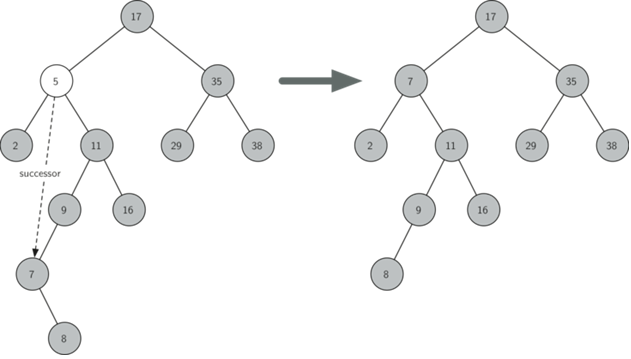

In [110]:
from IPython.display import Image
Image(filename = 'TwoChildren.PNG')

In [111]:
bst.delete(5)

In [112]:
# show the tree
showTree(bst.root)

Root Level 1
17

Left Level 2 - 1
7

Left Level 3 - 1
2

Right Level 3 - 2
11

Left Level 4 - 1
9

Left Level 5 - 1
8

Right Level 4 - 2
16

Right Level 2 - 2
35

Left Level 3 - 3
29

Right Level 3 - 4
38



#### Remove a Node that has only one child and show the tree to see the results

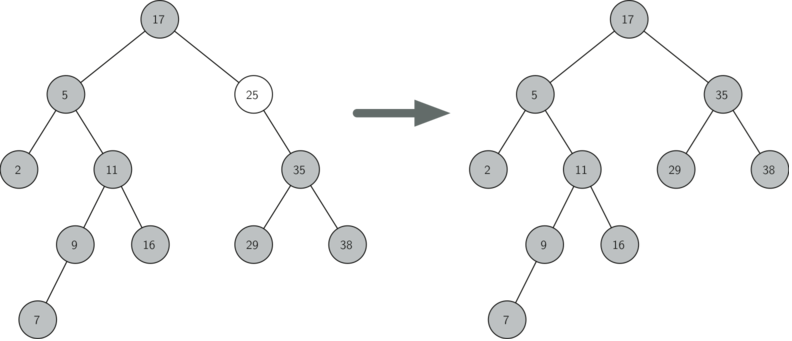

In [113]:
from IPython.display import Image
Image(filename = 'OneChild.PNG')

In [114]:
bst = BinarySearchTree()
bst.put(17, 'a')
bst.put(5, 'b')
bst.put(25, 'c')
bst.put(2, 'd')
bst.put(11, 'e')
bst.put(35, 'f')
bst.put(9, 'g')
bst.put(16, 'h')
bst.put(29, 'i')
bst.put(38, 'j')
bst.put(7, 'k')

In [115]:
showTree(bst.root)

Root Level 1
17

Left Level 2 - 1
5

Left Level 3 - 1
2

Right Level 3 - 2
11

Left Level 4 - 1
9

Left Level 5 - 1
7

Right Level 4 - 2
16

Right Level 2 - 2
25

Right Level 3 - 3
35

Left Level 4 - 3
29

Right Level 4 - 4
38



In [116]:
bst.delete(25)

In [117]:
showTree(bst.root)

Root Level 1
17

Left Level 2 - 1
5

Left Level 3 - 1
2

Right Level 3 - 2
11

Left Level 4 - 1
9

Left Level 5 - 1
7

Right Level 4 - 2
16

Right Level 2 - 2
35

Left Level 3 - 3
29

Right Level 3 - 4
38



#### Remove a Node that has no child and show the tree to see the results

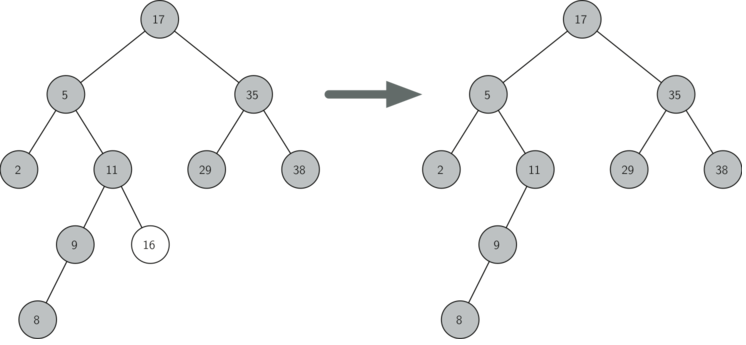

In [118]:
from IPython.display import Image
Image(filename = 'NoChild.PNG')

In [119]:
bst = BinarySearchTree()
bst.put(17, 'a')
bst.put(5, 'b')
bst.put(35, 'c')
bst.put(29, 'd')
bst.put(38, 'e')
bst.put(2, 'f')
bst.put(11, 'g')
bst.put(9, 'h')
bst.put(16, 'i')
bst.put(8, 'j')

In [120]:
showTree(bst.root)

Root Level 1
17

Left Level 2 - 1
5

Left Level 3 - 1
2

Right Level 3 - 2
11

Left Level 4 - 1
9

Left Level 5 - 1
8

Right Level 4 - 2
16

Right Level 2 - 2
35

Left Level 3 - 3
29

Right Level 3 - 4
38



In [121]:
bst.delete(16)

In [122]:
showTree(bst.root)

Root Level 1
17

Left Level 2 - 1
5

Left Level 3 - 1
2

Right Level 3 - 2
11

Left Level 4 - 1
9

Left Level 5 - 1
8

Right Level 2 - 2
35

Left Level 3 - 3
29

Right Level 3 - 4
38

